# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

During the simulation, the smartcab does not move. It is standing at a traffic light at the crossing. There are two parameters that are changing. On the one hand, the traffic light is either green or red. On the other hand, there either is oncoming traffic or there is none. The agent is rewarded if it does not move while the light is red or while the light is green while there is oncoming traffic. The agent is punished (it gets negative reward) when it idles while the light is green and there is no oncoming traffic. Right now, there does not seem to be anything forcing the agent to change the state, that is to drive. There also does not seem to be any reward associated with reaching a destination in time.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

*agent.py File (The answer to the question is in the 'Explanation of the three flags'-part, I will also not the other parameters because I would like to use this question to have an overview over all relevant parameters of the simulation)*

Flags:

learning : set to TRUE if the agent is expected to learn, set to FALSE otherwise

verbose : set to TRUE to diplay additional output during the simulation, set to FALSE otherwise

enforce_deadline : set to TRUE to enforce a deadline metric for the Smartcab-agent

display : set to TRUE if do display the GUI when the python script is running, set to FALSE otherwise

log_metrics : set to TRUE to log the results of the simulation to a log file, set to FALSE otherwise

optimized : set to TRUE to change the default log name, set to FALSE otherwise


Discrete values:

num_dummies : number of dummy agents (other cars moving randomly while obiding traffic laws) in the enviroment

grid_size : basically the size of the world, a tuple describing the number of intersections by providing the number of columns (unusual choice for the first value) and rows

n_tests : discrete number of testing trials, default is 0

Continuous values:

epsilon : exploration factor, default is one

epsilon_tolerance : epsilon tolerance before beginning the test, default value is .05

alpha : learning rate, default is .5

update_delay : continuous time between actions, default is 2. seconds

Explanation of three chosen flags:

1) learning : The agent will only learn if this flag is set to TRUE

2) enforce_deadline : Set to TRUE to enforce a deadline metric. I suppose that if this flag is said, we introduce negative rewards for the cases where the agent arrives late at the destination.

3) alpha : the learning rate. The learning rate was introduced in the course material. It describes how the reward resuling from an action that was taken starting from a state changes the Q-value associated with that state-action pair. A higher learning rate means that the action that was seen last has a stronger influence. For the default case, where the learning rate is .5, the new Q-value will be the average of the old Q-value and the one that was observed while taking the action.

*environment.py - file*

When an agent takes an action, the function 'act()' is called with the agent and the action that was taken as input parameters.

*simulator.py - file*

The render()-function is responsible to render the output that is visible in the GUI render display (the window displaying the city with the cars that pops up when the agent.py script is executed)

On the other hand, the render_text()-function is responsible to produce additional output that is displayed in the console where the agent.py - script was started.

*planner.py - file*

The 'next_waypoint'-function will consider the East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


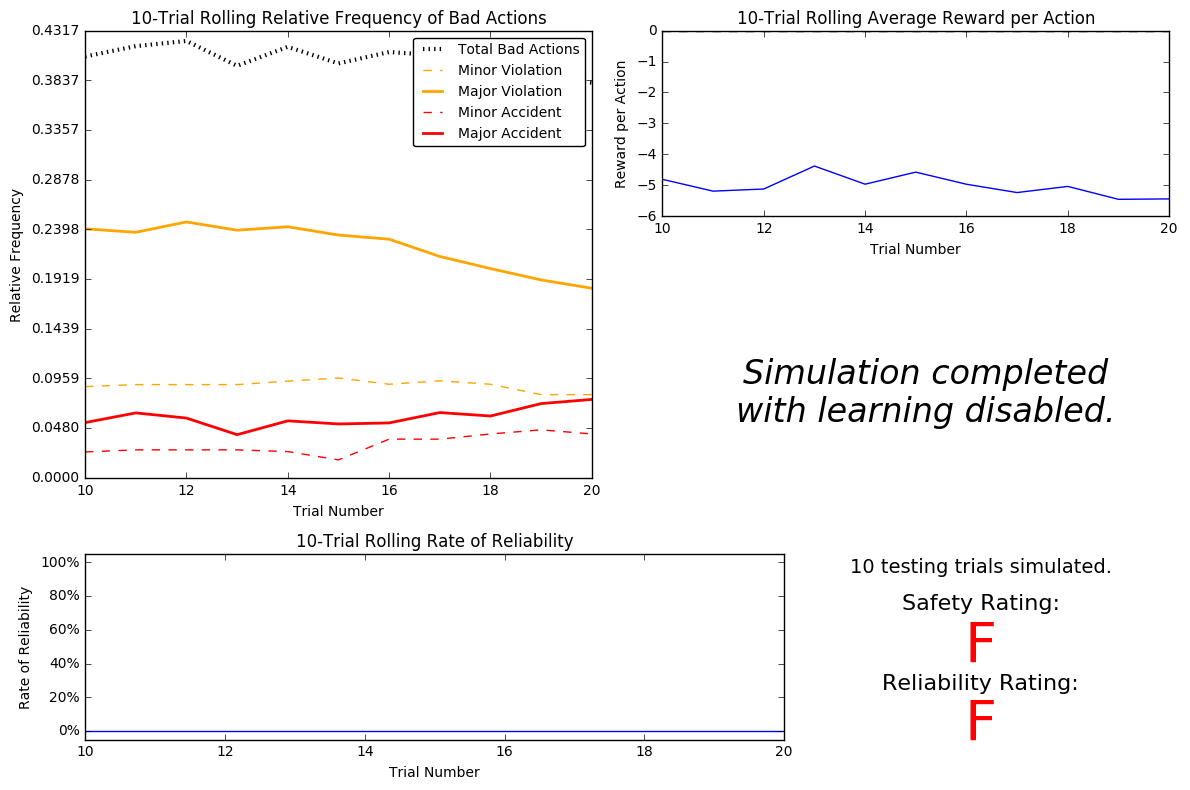

In [3]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

About 38 to 43 % of all actions that the agent takes are bad. About 10 to 12 % of all actions that it takes cause accidents. The agent is getting a negative reward all the time which does make sense considering the quality of its actions. As the agent is not learning, the outcome does not really change with a higher number of trials. As most of the actions of the agent are bad or even lead to accidents and it drives around randomly, it does make sense that it gets the minimal rating for reliability in all trials. With the big number of accidents that the smartcab is causing in the current state, it would definitely not be considered safe for the passengers of the other drivers. It also scores very poorly with respect to reliability. 

-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

**Answer from my first submission:**

The state of the traffic light and the behaviour of the other traffic participants (left, right, oncoming) are probably features that are relevant for both objective functions. They affect the safety directly as they dictate when the smartcar may drive without causing accidents (only in the cases where there is no traffic in the direction that it takes and the traffic light is green). They also affect the efficiency because it is desirable not to wait too long before taking an action as this makes arriving too late more probable (the smartcab does not always have to wait for the crossing to be absolutely free of other cars as there are also situations where multiple cars can cross the crossing safely at the same time).

The waypoint and the deadline features are probably not relevant for both safety and efficiency. They probably only affect efficiency. As long as time does not matter, the smartcab could just drive around the city. If it follows all traffic laws, it will be perfectly safe and will arrive at the destination at some point, so that both the time and the directions where the car is heading do not really play a role in this situation. They only get important if the smartcab has to drive efficiently, that is if it has to reach a certain destination before a certain deadline expires.

**Adjusted Answer after the feedback from my first reviewer**

After the feedback from my first reviewer, two things became clear to me:

1) It is essencial to include the 'waypoint'-feature into the state of the agent. Otherwise, the agent has no possibility to get information on where it should be headed and can not adjust its behavior to drive more efficiently.

2) On the other hand, I can reduce the state space by removing the features describing the intended directions of the vehicles to the left and to the right of the smartcab. In the simulation at hand, all intersections are equipped with traffic lights. Consequently, as long as the smartcab only drives when the light is green, it can not cause any accidents with the cars to the left or to the right. Removing these features from the state of the agent makes the state space 16 times smaller, so that it can achieve the top grades in reliability and safety with a much smaller number of training trials.

**Adjustements after the feedback from my second reviewer**

In my previous answer, I neglected the fact that our smartcab still may drive right if it is at a red light and wants to go right. However, in this case, it has to consider the traffic coming from the left. In order not to increase the state space too much, I would like to consider the traffic from the left only in the cases where the light is red and the waypoint is set to right. The traffic from the right does not need to be considered because we either have the right of way (when the right is green) or have to wait until the light is green so that the directional intention of the right traffic does not matter.

Justification for not including the 'deadline'-feature at all: I think that the 'deadline'-feature should not be included for two reasons: on the one hand, I do not think that it contains information that is not expandable. As long as we are driving in the right direction while obiding the traffic laws, we will get to the destination within the minimal time, so that the actual value of the time until the deadline expires should be irrelevant. The other critical thing is that the deadline feature is numerical, as opposed to the other features that are categorical. If we express the deadline as a number from 100 to 0 (percentage of time left until the deadline), adding this feature to our state would make the state space 100 times bigger. 

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Initial Answer:**

There are two states for the light
There are four states for each of the relevant directions

The size of the state space can hence be calculated by 2 x 4 x 4 x 4 = 128

We are currently learning with 20 trials with each trial having about 20 steps. So all in all, the agent sees about 400 state changes. If we assume that the states are encountered with an uniform distribution, the agent would see each state at least three times. As it has four possible actions, this would probably not suffice to learn a policy. However, I think that the agent may be able to learn a policy for each of the possible states in less than 100 trials.

**Adjusted Answer:**

We have two states for the light, 4 states for the oncoming traffic and 3 states for the waypoint (I think we do not have to consider the 'None'-value of the waypoint, as it only occurs when the smartcab is at the destination and the trial ends, so that the agent does not need to learn anything from this value). All in all, we have 24 different states.

**Second Adjustement**

As stated above, I neglected that the feature characterizing the traffic from the left has to be considered in some cases. If we were just to add it to our state description in a straight-forward way, this would result a state space with 24 * 4 = 96 states. To limit the growth of the state space, I would like to use the knowledge that we only have to consider the left traffic in the cases where the light is red and we want to go right. If the left traffic is only considered in these cases, our state space is increase by merely 12 additional states (For each of the four situations where the light is red and we want to go right, we get 4 states instead of the one we had so far => addition of 12), so that we end up having 36 states.

**Third Adjustement**

If we use the traffic coming from the left as part of each state, our state space will consist of 96 states overall.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

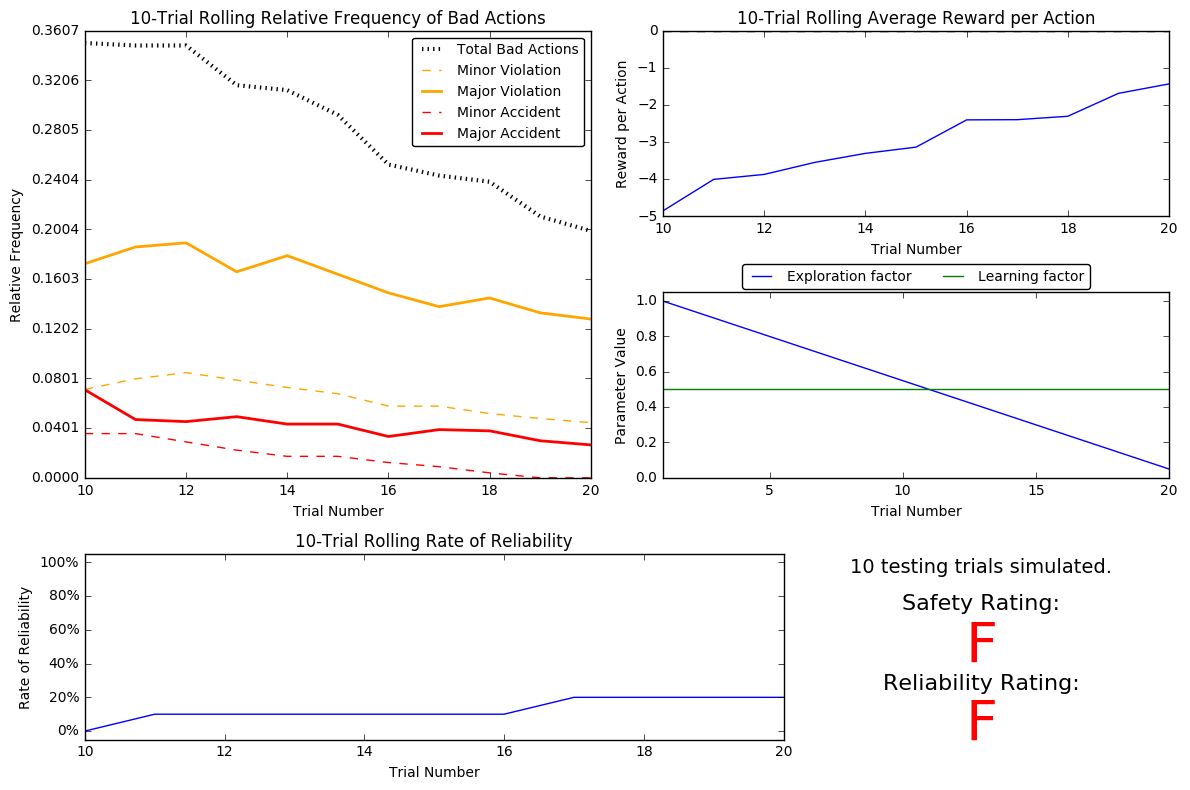

In [6]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

Beside the overall score, I do not see similarities between the results of the randomly driving agent and the default Q-learning agent. While the randomly driving agent had constantly bad scores, the Q-learning agent is improving in all objectives over the course of the training. I could imagine that it may need more training, that is, a slower decaying of the exploration rate.

The driving agent gets exactly 20 training trials. This does make sense because with our current decaying function, this is exactly the time needed to bring the exploration factor to zero. Consequently, the agent would not explore from this point on and instead just take the action that it thinks is the best one based on its prior experience.

The decaying function I implemented is indeed accurately represented. It starts of with a 1 (random actions) in the first trial and then linearly decreases towards .05 (actions are taken based on experience in 95 % of the cases) in the last training trial. 

There are indeed signs of learing and an improved behavior over the course of the training as the agent gets higher rewards and a better reliability rate in the later training trials. The number of bad actions that it takes also decreases from about .36 (more than every third action is bad) at the start to about .2 (a good action is taken 80 % of the time) at the end of the training.

The safety and reliability rating are still very bad. I would assume that the safety rating can be improved by increasing the number of the training trials (using a slower decaying of epsilon). As for the driving efficiency, I think that right at the moment, the agent does not get any feedback on where it is driving to. After improving the safety rating, I will try to use additional information (the waypoint and the deadline) to improve the driving efficiency of the agent.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

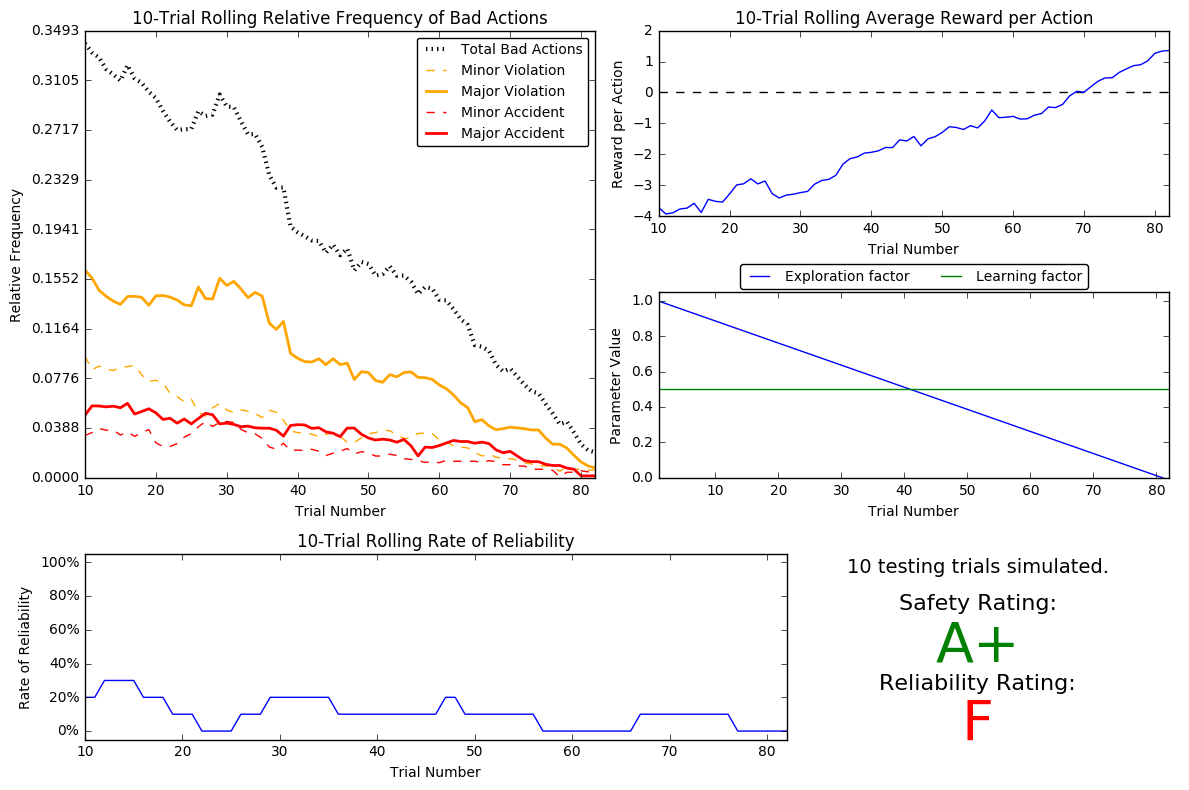

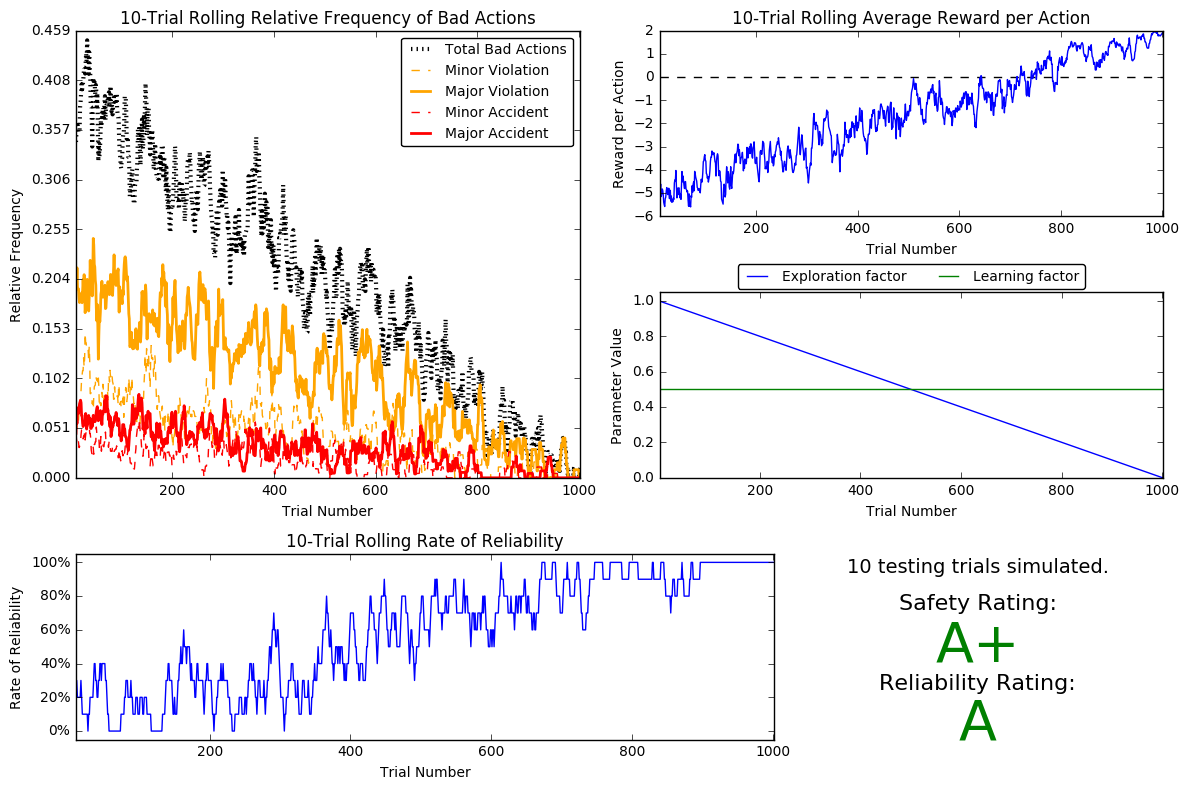

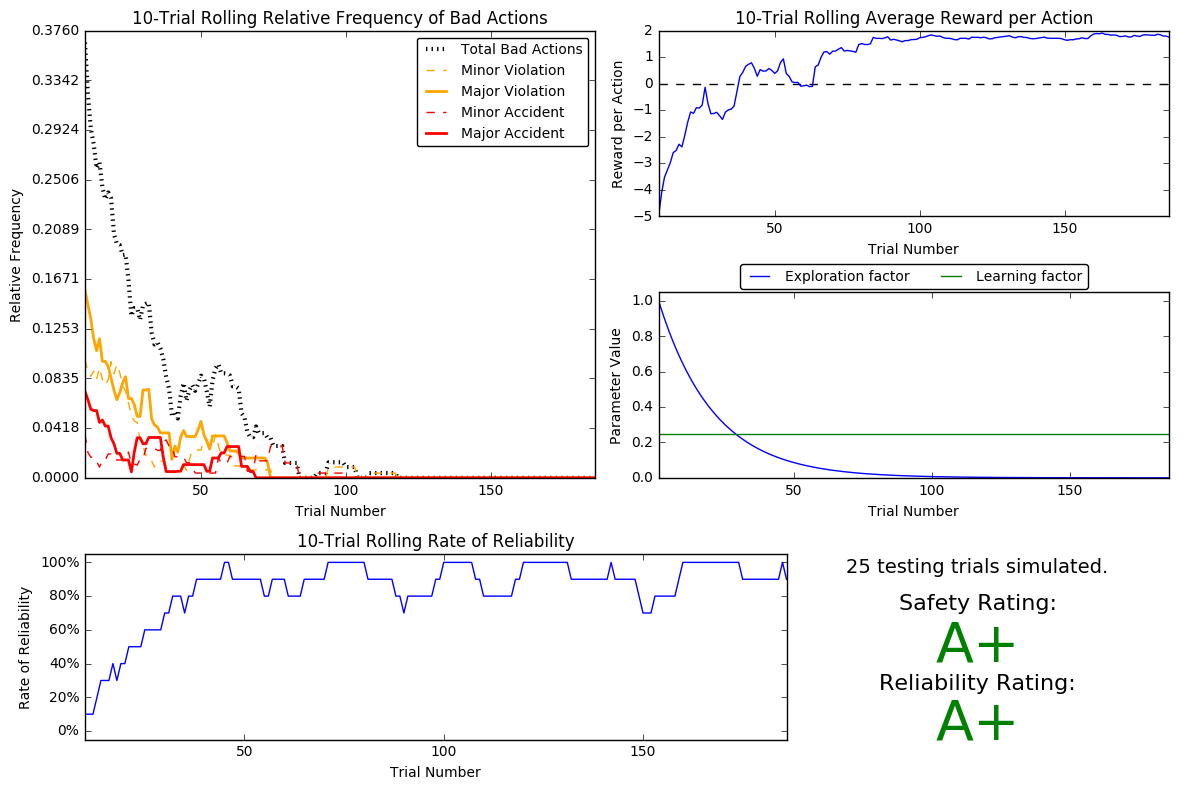

In [16]:
# Plot the results of a run focused only on safety
vs.plot_trials('sim_improved-safety_only.csv')

# Plot the results of the run focusing on both safety and efficiency with linear decaying and resulting in 1000 training trials
vs.plot_trials('sim_improved-1000.csv')

vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Previous Answer:**

During the optimization, I first focused on safety alone. During the first two trials, I found it peculiar that the reliability of the agent was not steadily improving, but instead going up and down during the training trials. I had the suspicion that this might have been caused by the fact that the driving agent's reward function depends on reaching the deadline, while the inputs that I was using for the formulation of the state did not contain any information about the waypoint or the deadline. Consequently, the driving agent can not learn effectively because the reward depends on information that is not visible for the agent. Indeed, disabling the deadline and decreasing the rate at which epsilon decays results in a behavior where the agent learns to drive very safely while absolutely ignoring the destination or the time it has to get there (first plotted graph above - file sim_improved-safety_only.csv).

To enable the agent to learn about its destination, I added the 'waypoint'-feature to its state. The idea for not including the deadline feature was that it should suffice to know where the destination is and to pick the actions that bring the agent to the destination in a safe way as fast as possible to fulfill sensible deadlines (I did not want to additionally increase the size of the state space by adding the deadline feature to the state as well). Of course, with including this additional feature, our state space gets 4 times bigger. At the same time, as our agent is now guided by two different objectives, it is to be expected that the improvement of the reward will not be a steady function. Both these points result in a longer training time that is required. With enough training time, the agent is able to reach very good grades on both the reliability and the efficiency (second graph - 1000 training trials).

**Adjusted Answer:**

With the drastically reduced state space, the agent is able to learn much faster, so that perfect grades can be achieved after less than 100 trials. The reduction of the state space had a much much stronger effect than the different decay functions and learning rates that I tried. The e ^ (-at) function with an a of .05, a learning rate of .25 and a tolerance of .01 lead to the perfect score.

**Second adjustement:**

As we get only a minor growth of the state space with the conditional addition of the left traffic, we get very good grades after less than 100 training trials.


**Third Adjustement:**

With the state space increased by considering the traffic from the left side, we need more training trials. However, the agent is nevertheless able to reach perfect grades after a reasonable amount of training.

I think we can say that there is clearly some improvement compared to the default Q-learner as the optimized Q-learner manages to get better grades after a smaller number of training trials. The continous improvement does show that with more training trials, the smartcab does learn a policy that provides safety and reliability. I think that 90 training trials are an acceptable number to reach the highest safety and reliability and I am satisfied with the result.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

Examples for an optimal policy:

With a red light, the optimal action always should be 'None' as the car is expected to stop.
With a green light, the optimal action should depend on where the smartcab has to go (the waypoint) and how the traffic there looks like. As all crossings in the simulation are regulated by traffic lights, the only relevant traffic is the oncoming traffic that has a green light at the same time (although depending on the behavior of other drivers, it may be useful to also learn to react properly when someone else does not drive according to the traffic laws). So if the light is green, we want to go forward or right, the optimal policy should be to go forward or right no matter what the oncoming traffic does. On the other hand, if we want to go left, the optimal policy in the cases where the oncoming traffic wants to go forward or right is to wait, that is to do nothing.

Example of policies learned during the Q-learning (order of the features: light, oncoming, waypoint, left):

('red', 'left', 'forward', 'forward', 'left')
 -- forward : -39.03
 -- right : 1.00
 -- None : 0.00
 -- left : -30.23
 
This is an example where considering the left traffic does pay off. Driving forward or left has a high negative reward (crossing the red light). However, driving right is okay as the traffic from the left is heading left.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Previous Answer:**

What we are doing right now requires just the consideration of one state. We are essentially teaching the smartcab how to cross one intersection while having a certain destination (as in wanting to go right, left or forward). If we wanted to consider future rewards, we would have to consider the states that a certain action leads us to. This however, is not feasible as the smartcab has no way of knowing how the traffic will look like at the next crossing (or even at this crossing one step in the future, if it should choose to just wait). We might try to teach the smartcab the probability of getting into a certain state when taking an action, but then it would just learn patterns in the traffic encountered during the training. With this, it could 'overfit' to the training experience and score poorly on the test. Consequently, concentrating on learning how to behave at a crossing without thinking about the future is the better option at this point.

**Extension:**

An additional problem is that the environment in our case has a lot of randomness to it. The periods of the traffic lights and the waypoints of the other cars are distributed randomly so that each action could lead to a great number of different states. As the environment is very random, I think that it is very unlikely that we could learn the probabilities of the state transitions to make use of the future reward information in our decision process. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.